# <font color='blue'>Interpolação de Funções</font>

## Exercícios

### Material produzido por Luis Gustavo Nonato

ICMC-USP

----

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange

### Exercício 1)
Dados um conjunto de pontos $\{x_1,\ldots,x_n\}$ e valores $\{y_1,\ldots ,y_n\}$, quais as hipóteses para que o polinômio interpolador exista e seja único?

**Solução**



A hipotese é que precisamos de um conjunto de pontos distintos, ou seja, $x_i\neq x_j,\, \forall i\neq j$.

### Exercício 2)
Sabendo que a equação $x−\exp(−x)=0$ tem uma raiz em [0,1], pode-se aproximar tal raiz utilizando um polinômio interpolador sobre 3 pontos. Encontre uma aproximação para a raiz utilizando tal esquema. Compare o resultado obtido com o zero encontrado pelo método de Newton.

**Solução**



O polinômio interpolador é: -0.30 x^2 + 1.91 x -0.99
As raízes são  0.57  5.73
Uma aproximação para a raiz é 0.567
A aproximação da raiz por Newton é 0.567


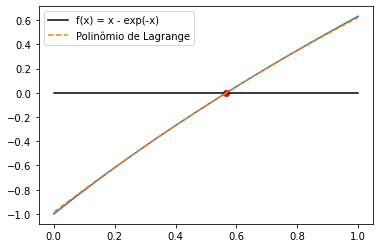

In [39]:
from scipy.optimize import newton

x = np.linspace(0,1,40)
f = lambda x: x - np.exp(-x)

plt.plot([0,1],[0,0], color = 'k', label='f(x) = x - exp(-x)')
plt.plot(x,f(x))

#Definindo os três pontos
#Note que a raiz se encontra entre [0.4,0.6]

xi = np.array([0.4,0.5,0.6])
yi = f(xi)
l = lagrange(xi,yi)

#l.c são os coeficientes do polinomio de lagrange organizados do
#maior para o menor associado aos x.
print('O polinômio interpolador é:', "%5.2f"%l.c[0], 'x^2', 
      "+%5.2f"%l.c[1], 'x', "%5.2f"%l.c[2])

#Calculando as raízes do polinômio
r1 = (-l.c[1] + np.sqrt(l.c[1]**2 - 4*l.c[0]*l.c[2]))/(2*l.c[0])
r2 = (-l.c[1] - np.sqrt(l.c[1]**2 - 4*l.c[0]*l.c[2]))/(2*l.c[0])
print('As raízes são',"%5.2f"%r1,"%5.2f"%r2)

print('Uma aproximação para a raiz é',"%5.3f"%r1)
plt.scatter(r1,f(r1),color='r')

fl = lambda x: l.c[0]*x**2 + l.c[1]*x + l.c[2]
plt.plot(x,fl(x),'--', label= 'Polinômio de Lagrange')
plt.legend()

# utilizando método de Newton
#No M de Newton é passado a função e o chute inicial
rnewton = newton(f,0.5)
print('A aproximação da raiz por Newton é',"%5.3f"%rnewton)

### Exercício 3)
Considere a função $f(x) = \cos(x)$ definida no intervalo $[0,1]$. Suponha que $f$ deva ser aproximada por um polinômio interpolador de grau $n$ de tal forma que o erro de aproximação seja menor ou igual a $10^{-1}$. Supondo uma amostragem de $f$ com pontos igualmente espaçados, encontre um valor de $n$ de modo que tal erro seja atingido.

Uma vez encontrado o grau do polinômio, defina o número de pontos que devem ser utilizados na aproximação e faça os gráficos de $f(x) = \cos(x)$ e do polinômio interpolador.

**Solução**

A fórmula do erro de aproximação para um polinômio de grau $n$ é

$$
E(x) = f(x)-P(x)=\frac{f^{\{n\}}(\xi)}{n!}\prod_{i=1}^{n}(x-x_i)
$$

Desta forma queremos que 

$$
\frac{f^{\{n\}}(\xi)}{n!}\prod_{i=1}^{n}(x-x_i)\leq 10^{-1}
$$

Como $f(x)=\cos(x)$ temos que $f^{\{n\}}(x)\leq 1$, assim

$$
\frac{f^{\{n\}}(\xi)}{n!}\prod_{i=1}^{n}(x-x_i)\leq \prod_{i=1}^{n}(x-x_i)
$$

Os pontos devem ser igualmentes espaçados e temos que ter $n+1$ pontos para obter um polinômio de grau $n$. Assim, os pontos $x_i$ serão dados por $x_i=(i-1)\,\frac{1}{n}$, ou seja $(x-x_i)\leq \frac{1}{n}$. Temos então que:

$$
\frac{f^{\{n\}}(\xi)}{n!}\prod_{i=1}^{n}(x-x_i)\leq \prod_{i=1}^{n}(x-x_i) \leq \left(\frac{1}{n}\right)^{n}<\frac{1}{n}\leq 10^{-1}
$$

Assim, $n \geq 10$.



erro médio 4.641154127682512e-12


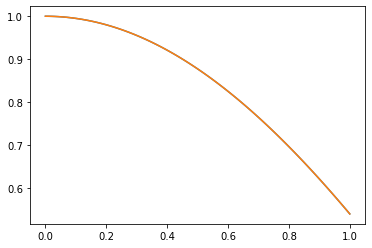

In [40]:
#Calculo do produtório Li
def li(t,x,i):
    numerador = np.asarray([t-x[j] for j in range(x.size) if j!=i])
    denominador = x[i]-x
    denominador[i] = 1
    return(np.prod(numerador,axis=0)/np.prod(denominador))

n = 10
x = np.linspace(0,1,n)
f = lambda x: np.cos(x)
t = np.linspace(0,1,100)

#polinomio de lagrange
pl = np.sum(np.array([f(x[i])*li(t,x,i) for i in range(n)]),axis=0)

plt.plot(t,pl)
plt.plot(t,f(t))

print('erro médio',np.sum(np.abs(pl-f(t)))/n)

### Exercício 4)
Considere a matriz abaixo, onde a primeira linha corresponde a coordenada $x$ e a segunda a coordenada $y$ dos pontos que definem a figura apresentada.

Construa uma aproximação suave da figura utilizando splines cúbicas.

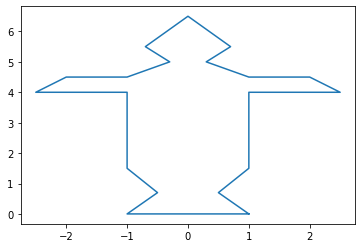

In [41]:
ptos = np.array([[1.0, 0.5, 1.0, 1.0, 2.0, 2.5, 2.0, 1.0, 0.3, 0.7, 0.0, -0.7, -0.3, -1.0, -2.0, -2.5, -2.0, -1.0, -1.0, -0.5, -1.0, 1.0],
                 [0.0, 0.7, 1.5, 4.0, 4.0, 4.0, 4.5, 4.5, 5.0, 5.5, 6.5, 5.5, 5.0, 4.5, 4.5, 4.0, 4.0, 4.0, 1.5, 0.7, 0.0, 0.0]])

plt.plot(ptos[0,:],ptos[1,:])

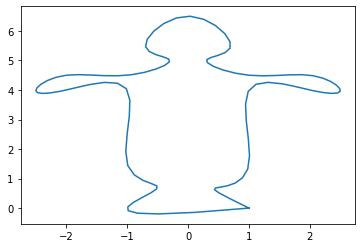

In [50]:
# Solução
#numero de pontos
n = ptos.shape[1]
x = np.linspace(0,1,n)

#Calculando a spline para x e y 
#Calcula a função para os pontos x e
#para os pontos y
csx = CubicSpline(x,ptos[0,:])
csy = CubicSpline(x,ptos[1,:])

t = np.linspace(0,1,100)
#aplica a função nas curvas
pcsx = csx(t)
pcsy = csy(t)

plt.plot(pcsx,pcsy)

### Exercício 5)
Considere o conjunto de valores $y_i$ fornecidos na célula abaixo e suponha que o domínio esteja definio no intervalo $[-\pi,\pi]$. Realize interpolação usando polinômios de Lagrande e Splines Cúbicas. Compare graficamente as duas soluções.

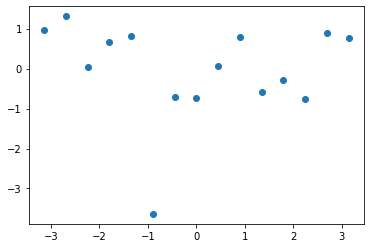

In [51]:
x = np.linspace(-np.pi,np.pi,15)
y = np.sin(2*x**2) - 0.5/(1+x) + np.random.uniform(-0.3,0.3,15)

plt.scatter(x,y)

          14            13          12          11         10         9
0.005401 x  - 0.007093 x  - 0.1492 x  + 0.1929 x  + 1.546 x  - 1.954 x
         8         7        6         5         4         3        2
 - 7.52 x + 9.148 x + 17.4 x - 19.69 x - 16.95 x + 15.95 x + 4.82 x - 1.626 x - 0.7296


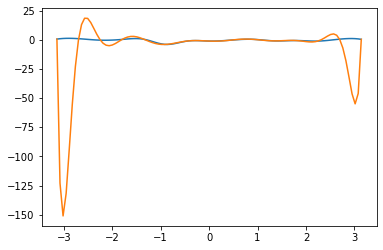

In [58]:
n = 100

#Usa os pontos para calcular a função de interpolação
cs = CubicSpline(x,y)
la = lagrange(x,y)

#intervalo de pontos
t = np.linspace(-np.pi,np.pi,n)

#Calcula a curva com a função
pcs = cs(t)
pla = la(t)

plt.plot(t,pcs)
plt.plot(t,pla)